# Chapter 

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size


In [3]:
# information about the data
#https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

# raw data file
#https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data

# dataset citation (see also above website for more):
# Redmond, M. A. and A. Baveja: A Data-Driven Software Tool for Enabling Cooperative Information Sharing Among Police Departments. European Journal of Operational Research 141 (2002) 660-678.

In [4]:

# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data
     

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [10]:
# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
print(dataMat.shape)
dataMat

(1994, 100)


array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [11]:
# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)
print(datamean.shape)
datamean

(100,)


array([0.05759278, 0.46339519, 0.17962889, 0.75371615, 0.15368104,
       0.14402207, 0.42421765, 0.4938666 , 0.33626379, 0.42316449,
       0.06407222, 0.69626881, 0.36112337, 0.55815446, 0.29156971,
       0.49568706, 0.4711334 , 0.31777834, 0.47924774, 0.37567703,
       0.35025075, 0.36804915, 0.29109829, 0.20350552, 0.32235707,
       0.38627884, 0.05550652, 0.30302407, 0.31580742, 0.38332999,
       0.36167503, 0.36353059, 0.50107322, 0.39638415, 0.44059679,
       0.39122367, 0.44133902, 0.46124373, 0.43445336, 0.4875677 ,
       0.49427282, 0.48774824, 0.61091775, 0.62065697, 0.6640321 ,
       0.58288365, 0.50144935, 0.52669007, 0.03629388, 0.24999498,
       0.03006018, 0.32021063, 0.36062187, 0.39907723, 0.42787864,
       0.18136409, 0.18212638, 0.18477432, 0.18287864, 0.78590271,
       0.15058676, 0.26760782, 0.25189067, 0.4621013 , 0.49442828,
       0.40409729, 0.56259779, 0.18626379, 0.49518556, 0.31469408,
       0.07681545, 0.71954865, 0.54868606, 0.20452859, 0.43333

In [14]:
# mean-center the data using broadcasting
dataMatM = dataMat - datamean

dataMatM

array([[ 0.13240722, -0.13339519, -0.15962889, ...,  0.03831494,
         0.22594784, -0.03797894],
       [-0.05759278, -0.30339519, -0.05962889, ...,  0.28831494,
        -0.09405216,  0.43202106],
       [-0.05759278, -0.04339519,  0.31037111, ..., -0.14168506,
        -0.09405216,  0.19202106],
       ...,
       [ 0.10240722, -0.09339519,  0.07037111, ...,  0.01831494,
         0.81594784, -0.00797894],
       [ 0.02240722,  0.04660481, -0.11962889, ...,  0.16831494,
         0.12594784, -0.04797894],
       [ 0.14240722,  0.31660481, -0.03962889, ..., -0.11168506,
         0.90594784,  0.24202106]])

In [25]:
# confirm that any given feature has mean=0 (or very close...)
print(round(np.mean(dataMatM[:,0]), 5))


0.0


In [30]:
# Obtain N 
N = dataMatM.shape[0]

# Perform matrix mult 
xTx = dataMatM.T @ dataMatM

# Compute covariance matrix dividing by N - 1
covMat = (N - 1)**-1 * xTx

covMat

array([[ 0.01610509, -0.00095881,  0.00743543, ...,  0.0078588 ,
         0.01422331,  0.01085579],
       [-0.00095881,  0.02680317, -0.00278454, ..., -0.00193146,
        -0.00371296, -0.00133207],
       [ 0.00743543, -0.00278454,  0.06423288, ...,  0.008535  ,
         0.0158847 ,  0.03727496],
       ...,
       [ 0.0078588 , -0.00193146,  0.008535  , ...,  0.0524661 ,
         0.01137541,  0.00820928],
       [ 0.01422331, -0.00371296,  0.0158847 , ...,  0.01137541,
         0.05775768,  0.01952064],
       [ 0.01085579, -0.00133207,  0.03727496, ...,  0.00820928,
         0.01952064,  0.05428196]])

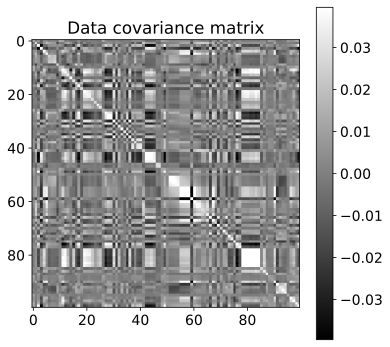

In [33]:
# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2

# and show it
plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
plt.colorbar()
plt.title('Data covariance matrix')
plt.savefig('Figure_07_01.png',dpi=300)
plt.show()